In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor   
from sklearn.metrics import mean_absolute_error

In [24]:
# Step 1: Load Dataset
dataset = pd.read_csv('/home/shohreh/Desktop/dataset.csv')    
print("Dataset loaded successfully. Preview:")
print(dataset.head())

Dataset loaded successfully. Preview:
   Vibration_Speed  Drum_Speed  Belt_Speed  Aluminum_in_Plastics  \
0                4           6         0.5                    33   
1                4           6         1.0                    35   
2                4           6         2.0                    35   
3                4           6         3.0                    49   
4                4           6         4.0                    61   

   Copper_in_Plastics  Brass_in_Plastics  Plastics_in_Metals  Drum_Angle  
0                  25                  7                  52          20  
1                  27                 11                  47          20  
2                  17                 12                  27          20  
3                  33                 17                  17          20  
4                  46                 41                  23          20  


In [36]:
# Step 2: Define Features (X) and Targets (y)
X = dataset[['Vibration_Speed', 'Drum_Speed', 'Belt_Speed', 'Aluminum_in_Plastics',
             'Copper_in_Plastics', 'Brass_in_Plastics', 'Plastics_in_Metals',
             'Drum_Angle']]  # متغیرهای ورودی
y = dataset[['Vibration_Speed', 'Drum_Speed', 'Belt_Speed', 'Drum_Angle']]  


In [37]:
# Step 3: Normalize Features (X)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalizing input features
print("\nFeatures normalized successfully!")


Features normalized successfully!


In [38]:
# Step 4: Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Step 5: Train the MultiOutputRegressor Model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

print("\nModel trained successfully!")



Model trained successfully!


In [40]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values') 
print("\nModel Evaluation (Mean Absolute Error for each output):")
for col, error in zip(y.columns, mae):
    print(f"{col}: {error}")


Model Evaluation (Mean Absolute Error for each output):
Vibration_Speed: 0.0
Drum_Speed: 0.0
Belt_Speed: 0.05470588235294113
Drum_Angle: 0.0


In [41]:
# Step 7: Predict Optimal Settings
example_input = [[4, 6, 3, 33, 25, 7, 52, 20]]  
predicted_output = model.predict(example_input)
print("\nPredicted Outputs for the given example input:")
output_df = pd.DataFrame(predicted_output, columns=y.columns)
print(output_df)



Predicted Outputs for the given example input:
   Vibration_Speed  Drum_Speed  Belt_Speed  Drum_Angle
0              4.0         6.0        2.95        20.0


/home/shohreh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/shohreh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/shohreh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/shohreh/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [42]:
# Step 8: Save the Model
import joblib
joblib.dump(model, 'multioutput_regression_model.pkl')
print("\nModel saved as 'multioutput_regression_model.pkl'")


Model saved as 'multioutput_regression_model.pkl'


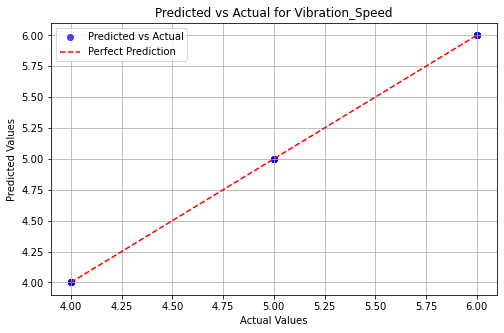

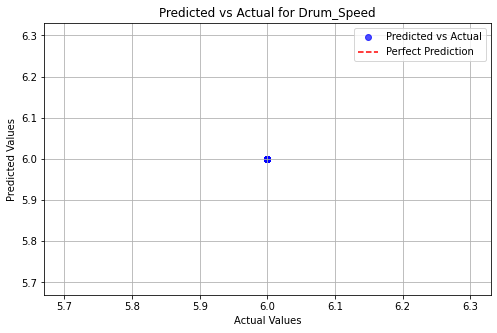

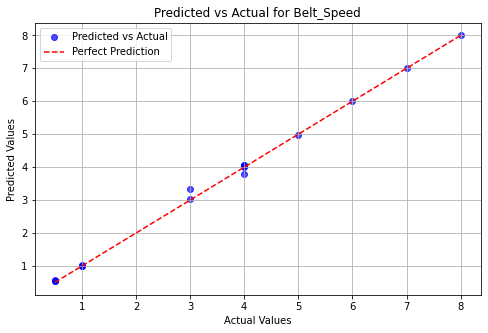

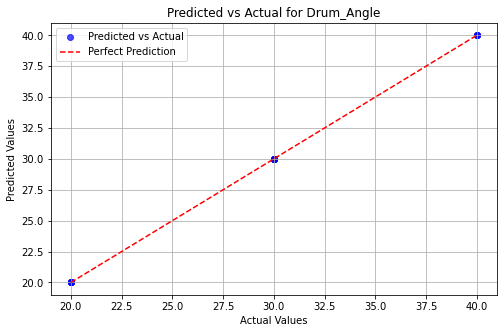

In [43]:
# step 9: Visualization
import matplotlib.pyplot as plt
import numpy as np

# Step 7: Visualize Predictions vs True Values
for i, col in enumerate(y.columns):  # Iterate over each output variable
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.7, color='b', label='Predicted vs Actual')
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             'r--', label='Perfect Prediction')  # Perfect prediction line
    plt.title(f'Predicted vs Actual for {col}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()


In [44]:
# Importing seaborn
import seaborn as sns


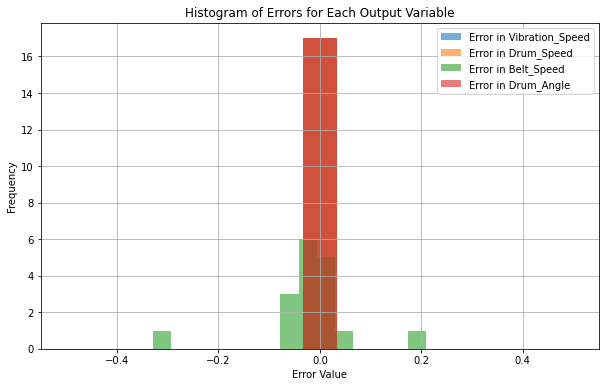

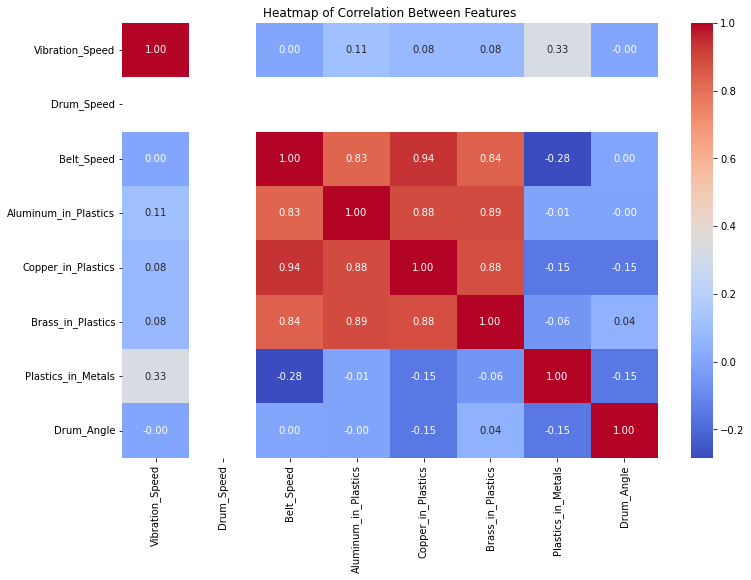

In [45]:
# Histogram of Errors
errors = y_test.values - y_pred
plt.figure(figsize=(10, 6))

for i, col in enumerate(y.columns):
    plt.hist(errors[:, i], bins=15, alpha=0.6, label=f'Error in {col}')

plt.title('Histogram of Errors for Each Output Variable')
plt.xlabel('Error Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Heatmap of Correlation
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Features')
plt.show()
